In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


<Axes: >

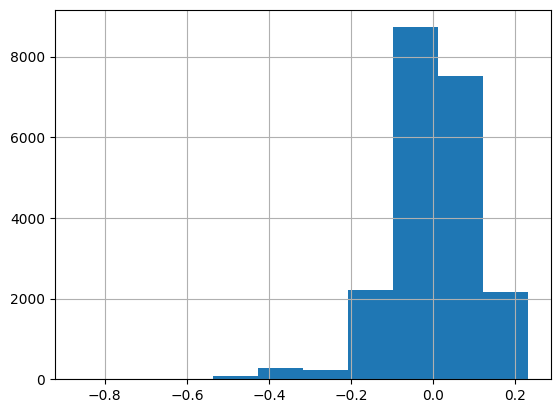

In [4]:
df['x_e_out [-]'].hist()

## Rename features

In [5]:
rename_dic = dict(
    zip(df.columns,
       [
           'id',
           'author',
           'geometry',
           'pressure',
           'mass_flux',
           'x_e',
           'd_e',
           'd_h',
           'length',
           'chf_exp'
       ]
    )
)

In [6]:
df.rename(columns = rename_dic, inplace = True)

In [7]:
df.head()

,id,author,geometry,pressure,mass_flux,x_e,d_e,d_h,length,chf_exp
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


<Axes: >

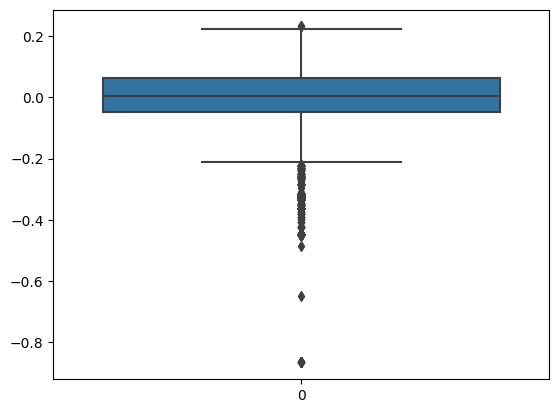

In [8]:
sns.boxplot(df['x_e'])

In [9]:
df.dropna(inplace = True)

In [10]:
np.dtype(df['author'])

dtype('O')

In [11]:
cat_cols = [col  for col in df.columns if(np.dtype(df[col]) == 'object')]
num_cols = [col for col in df.columns if (np.dtype(df[col]) != 'object')]

In [12]:

df.drop(['id'], axis=1, inplace=True)

In [13]:
df[:5]

,author,geometry,pressure,mass_flux,x_e,d_e,d_h,length,chf_exp
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
9,Peskov,tube,12.00,1617.0,0.1228,10.0,10.0,520.0,2.2
15,Thompson,tube,12.07,3255.0,0.0406,1.9,1.9,152.0,2.9
17,Thompson,tube,10.41,2563.0,0.1092,4.6,4.6,229.0,6.8
30,Janssen,annulus,9.68,5615.0,0.0196,12.7,38.1,914.0,2.9


In [14]:
df.reset_index(inplace=True)

In [17]:
df.drop(['index'], axis=1, inplace=True)

In [18]:
df['author'].value_counts()

author
Thompson        4285
Janssen          666
Weatherhead      488
Beus             397
Peskov           278
Williams         214
Richenderfer     125
Mortimore         50
Kossolapov        24
Inasaka           11
Name: count, dtype: int64

** так как автор thompson очень часто встречается имеет смысл заполнить им пустые значения 

In [19]:
df['geometry'].value_counts()

geometry
tube       5287
annulus    1107
plate       144
Name: count, dtype: int64

<Axes: xlabel='x_e', ylabel='Density'>

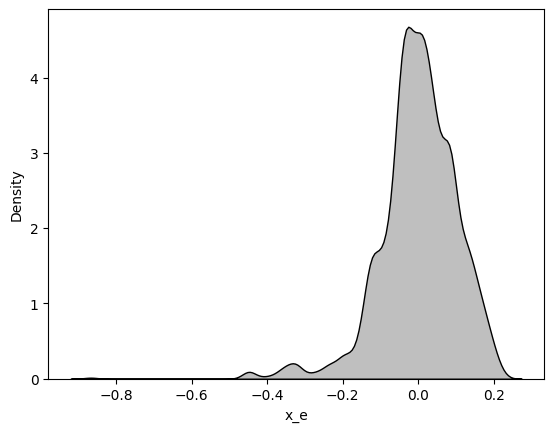

In [24]:
sns.kdeplot(df['x_e'],fill=True, color='black')

In [26]:
train = pd.read_csv('./data.csv')

In [27]:
train.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [28]:
train.drop(['id'], axis=1, inplace=True)

In [30]:
train['author'].fillna('Thompson', inplace=True)
train['geometry'].fillna('tube', inplace=True)
train = pd.get_dummies(train,drop_first = True)

In [31]:
train

,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],author_Inasaka,author_Janssen,author_Kossolapov,author_Mortimore,author_Peskov,author_Richenderfer,author_Thompson,author_Weatherhead,author_Williams,geometry_plate,geometry_tube
0,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6,False,False,False,False,False,False,True,False,False,False,True
1,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2,False,False,False,False,False,False,True,False,False,False,True
2,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5,False,False,False,False,False,False,True,False,False,False,True
3,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0,False,False,False,False,False,False,False,False,False,False,False
4,13.79,686.0,NaN,11.1,11.1,457.0,2.8,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31639,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3,False,False,False,False,False,False,True,False,False,False,True
31640,13.79,NaN,NaN,4.7,4.7,NaN,3.9,False,False,False,False,False,False,True,False,False,False,True
31641,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3,False,False,False,False,False,False,True,False,False,False,True
31642,6.89,3825.0,NaN,23.6,23.6,1972.0,3.7,False,False,False,False,False,False,True,False,False,False,True


In [33]:

train_copy = train.copy()
null_features = [col for col in train_copy.columns if train_copy[col].isnull().sum()>0]
independent_features = [col for col in train_copy.columns if train_copy[col].isnull().sum()==0 if col!= 'x_e_out [-]']
for feature in null_features:
            
    x_train = train_copy[train_copy[feature].isna() == False][independent_features]
    y_train = train_copy[train_copy[feature].isna() == False][feature]
    test_data = train_copy[train_copy[feature].isna() == True][independent_features]
        
    print(x_train.shape,y_train.shape,test_data.shape)

(27192, 12) (27192,) (4452, 12)
(26853, 12) (26853,) (4791, 12)
(21229, 12) (21229,) (10415, 12)
(26156, 12) (26156,) (5488, 12)
(27055, 12) (27055,) (4589, 12)
(26885, 12) (26885,) (4759, 12)


In [43]:
x_train

,chf_exp [MW/m2],author_Inasaka,author_Janssen,author_Kossolapov,author_Mortimore,author_Peskov,author_Richenderfer,author_Thompson,author_Weatherhead,author_Williams,geometry_plate,geometry_tube
0,3.6,False,False,False,False,False,False,True,False,False,False,True
1,6.2,False,False,False,False,False,False,True,False,False,False,True
2,2.5,False,False,False,False,False,False,True,False,False,False,True
3,3.0,False,False,False,False,False,False,False,False,False,False,False
4,2.8,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
31638,9.0,False,False,False,False,False,False,True,False,False,False,True
31639,2.3,False,False,False,False,False,False,True,False,False,False,True
31641,2.3,False,False,False,False,False,False,True,False,False,False,True
31642,3.7,False,False,False,False,False,False,True,False,False,False,True


In [45]:
from sklearn.linear_model import LogisticRegression 
logit = LogisticRegression(random_state=17, C=1.0)
logit.fit(x_train,y_train)
y_prediction = logit.predict(test_data)

/home/horcrux/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,chf_exp [MW/m2],author_Inasaka,author_Janssen,author_Kossolapov,author_Mortimore,author_Peskov,author_Richenderfer,author_Thompson,author_Weatherhead,author_Williams,geometry_plate,geometry_tube
16,5.3,False,False,False,False,False,False,True,False,False,False,True
24,2.9,False,False,False,False,False,False,True,False,False,False,True
46,3.9,False,False,False,False,False,False,True,False,False,False,True
50,2.6,False,False,False,False,False,False,True,False,False,False,True
51,3.5,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
31619,3.6,False,False,False,False,False,False,True,False,False,False,True
31620,6.4,False,False,False,False,False,False,True,False,False,False,True
31628,2.5,False,False,False,False,False,False,True,False,False,False,True
31633,2.0,False,False,False,False,False,False,True,False,False,False,True


In [48]:
def write_to_submission_file(
    predicted_labels, out_file, target="target", index_label="session_id"
):
    predicted_df = pd.DataFrame(
        predicted_labels,
        index=np.arange(1, predicted_labels.shape[0] + 1),
        columns=[target],
    )
    predicted_df.to_csv(out_file, index_label=index_label)

In [53]:
output = pd.DataFrame({'id': np.arange(1, y_prediction.shape[0] + 1),
                      'x_e_out [-]': y_prediction})
output

,id,x_e_out [-]
0,1,762.0
1,2,318.0
2,3,318.0
3,4,591.0
4,5,318.0
...,...,...
4754,4755,318.0
4755,4756,762.0
4756,4757,591.0
4757,4758,591.0
